In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# Load keras.datasets.fashion_mnist data into (train_images, train_labels), (test_images, test_labels)
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Implement an MLP architecture that can be trained on the fashion dataset. Select the number of layers
# to be 64 and number of nodes in each layer to be 128. The input and output layers’ nodes need to be determined
# based on the dataset.
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

# Compile the model with the loss function as sparse_categorical_crossentropy and optimizer as adam.
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Using 10 epochs and a batch size of 64, train the model on the training data.
model.fit(train_images, train_labels, epochs=10, batch_size=64)

# Evaluate the model using the test data and labels.
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# Print the test accuracy.
print('Test accuracy:', test_acc)

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/10
938/938 [==============================] - 26s 26ms/step - loss: 3.3446 - accuracy: 0.7258
Epoch 2/10
938/938 [==============================] - 12s 13ms/step - loss: 0.5410 - accuracy: 0.8023
Epoch 3/10
938/938 [==============================] - 11s 12ms/step - loss: 0.4689 - accuracy: 0.8343
Epoch 4/10
938/938 [==============================] - 11s 12ms/step - loss: 0.4360 - accuracy: 0.8448
Epoch 5/10
938/938 [==============================] - 13s 14ms/step - loss: 0.4063 - accuracy: 0.8557
Epoch 6/10
938/938 [==============================] - 12s 12ms/step - loss: 0.4027 - accuracy: 0.8563
Epoch 7/10
938/938 [==============================] - 12s 12ms/step - loss: 0.3761 - accuracy: 0.8662
Epoch 8/10
938/938 [==============================] - 12s 13ms/step - loss: 0.3670 - accuracy: 0.8687
Epoch 9/10
938/938 [==============================] - 12s 12ms/step - loss: 0.3474 - accuracy: 0.8766
Epoch 10/10
938/938

In [ ]:
# List of hyperparameters
hidden_layers = [128, 256]
nodes = [64, 128]
activation = ['relu', 'sigmoid']

# Variables to store best hyperparameter combination.
# Defualt values are set to the first combination.
best_hidden_layer = 128
best_node = 128
best_activation = 'relu'
best_acc = 0

# Variables to store accuracy data into.
training_accuracy = []
validation_accuracy = []


In [ ]:
# Create a list that contains layers nodes and activation function
hyperparameters = [(hidden_layer, node, act) for hidden_layer in hidden_layers for node in nodes for act in activation]
# Loop through the list of hyperparameters
for hidden_layer, node, act in hyperparameters:
    # Create the model
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(hidden_layer, activation=act),
        keras.layers.Dense(node, activation=act),
        keras.layers.Dense(10)
    ])
    # Compile the model
    model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    # Store training accuracy results in history varaiable
    history = model.fit(train_images, train_labels, epochs=10, batch_size=64)
    # Add the accuracy from the training set to the training accuracy variable
    training_accuracy.append(history.history['accuracy'][-1])
    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
    # Add the accuracy from the test to the validation accuracy list
    validation_accuracy.append(test_accuracy)
    # Print the test accuracy for each combination
    print('\nhidden_layer: {}, node: {}, activation: {}, test_accuracy: {}\n'.format(hidden_layer, node, act, test_accuracy))
    # Update the best hyperparameter variables if the new test accuracy is better than the previous best accuracy
    if test_accuracy > best_acc:
        best_hidden_layer = hidden_layer
        best_node = node
        best_activation = act
        best_acc = test_accuracy

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 1.9060 - accuracy: 0.7164
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.6104 - accuracy: 0.7980
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.5312 - accuracy: 0.8183
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.4963 - accuracy: 0.8298
Epoch 5/10
938/938 [==============================] - 4s 5ms/step - loss: 0.4600 - accuracy: 0.8407
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.4331 - accuracy: 0.8493
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.4126 - accuracy: 0.8553
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3930 - accuracy: 0.8607
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3747 - accuracy: 0.8674
Epoch 10/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3700 - accuracy: 0.8684

In [ ]:
# Print the best hyperparameters
print('best_hidden_layer: {}, best_node: {}, best_activation: {}, best_acc: {}\nTraining the best model on our training set...'.format(best_hidden_layer, best_node, best_activation, best_acc))

# Using the best hyperparameters, create a model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(best_hidden_layer, activation=best_activation),
    keras.layers.Dense(best_node, activation=best_activation),
    keras.layers.Dense(10)
])

# After compiling, train the model using the best hyperparameters from earlier.
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=64)

best_hidden_layer: 256, best_node: 128, best_activation: relu, best_acc: 0.8511000275611877
Training the best model on our training set...
Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 2.8344 - accuracy: 0.7633
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.5715 - accuracy: 0.8204
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.4682 - accuracy: 0.8389
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.4340 - accuracy: 0.8481
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.4123 - accuracy: 0.8538
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3965 - accuracy: 0.8584
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3780 - accuracy: 0.8654
Epoch 8/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3748 - accuracy: 0.8648
Epoch 9/10
938/938 [==============================] - 5s 5ms/

In [ ]:
# Evaluate the model using the test data and labels.
print('Evaluating the model...')
test_loss, test_a = model.evaluate(test_images, test_labels, verbose=2)

# Print the test accuracy.
print('Final trained accuracy:', test_a)

Evaluating the model...
313/313 - 1s - loss: 0.4332 - accuracy: 0.8547 - 785ms/epoch - 3ms/step
Final trained accuracy: 0.8547000288963318


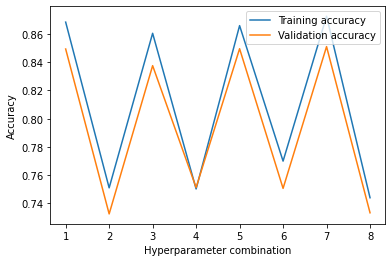

In [ ]:
# Plot the training accuracy and the validation accuracy for each combination
plt.plot(range(1, 9), training_accuracy)
plt.plot(range(1, 9), validation_accuracy)
plt.xlabel('Hyperparameter combination')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.show()

In [ ]:
# Both plots of data follow a similar trend. They are similar since they are both trained on 
# similar subsets of the same data. The peaks seen in the figure above are due to the different
# activation functions used when training and validating the data. We were bound to see similarities
# due to the reason mentioned earlier and because we kept the constraints pretty tight. 
# The best accuracy from the training was around 85.11% with a hidden layer value of 256, 
# a node value of 128, and activation function of 'relu'. After using these hyperparameters 
# to train our model, a accuracy of 85.47% was achieved. 